In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [6]:
iris = load_iris(as_frame=True)
df = iris.frame
X = df[iris.feature_names]
y = df["target"]
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
model = DecisionTreeClassifier(max_depth=12, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1: {f1:.3f}\n")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy : 0.933
Precision: 0.933
Recall: 0.933
F1: 0.933

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



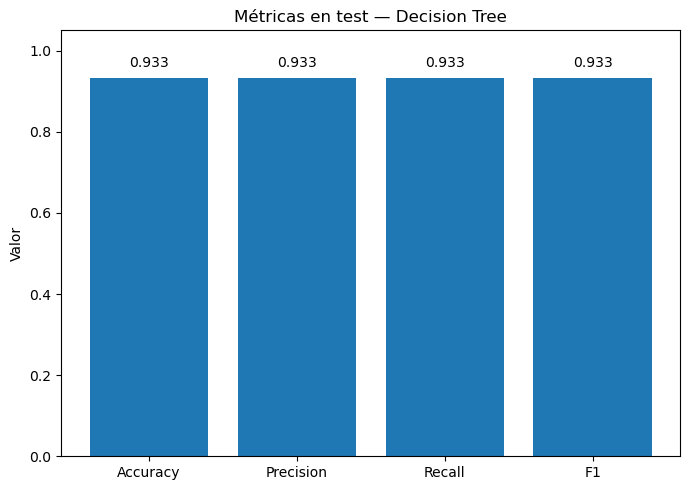

In [10]:
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals)
plt.ylim(0, 1.05)
plt.title("Métricas en test — Decision Tree")
plt.ylabel("Valor")
# etiquetas con el valor encima de cada barra
for rect, val in zip(bars, metric_vals):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

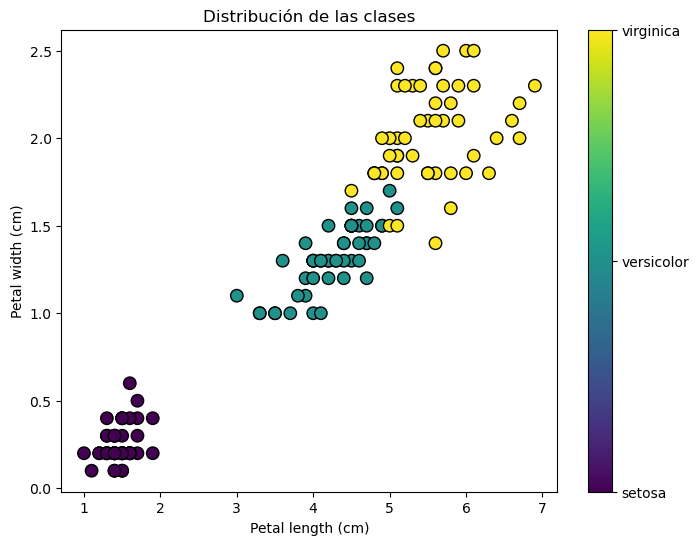

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["petal length (cm)"],
    df["petal width (cm)"],
    c=df["target"], cmap="viridis", edgecolor="k", s=80
)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Distribución de las clases")
cbar = plt.colorbar()
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(class_names)
plt.show()

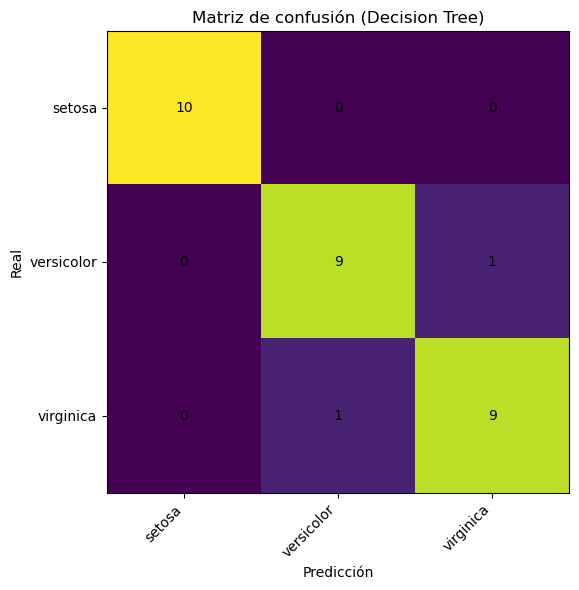

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,6))
plt.imshow(cm)
plt.title("Matriz de confusión (Decision Tree)")
plt.xticks(ticks=[0,1,2], labels=class_names, rotation=45, ha='right')
plt.yticks(ticks=[0,1,2], labels=class_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

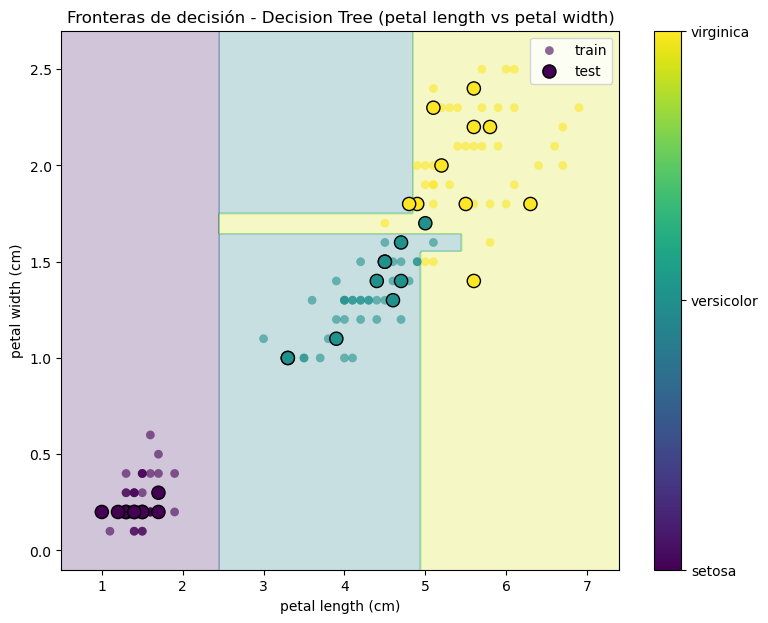

In [23]:
feat_x = "petal length (cm)"
feat_y = "petal width (cm)"
X2_train = X_train[[feat_x, feat_y]].to_numpy()
X2_test  = X_test[[feat_x, feat_y]].to_numpy()

model2d = DecisionTreeClassifier(
        max_depth=8, random_state=42
)
model2d.fit(X2_train, y_train)

# malla para el plano 2D
x_min, x_max = X[[feat_x]].min().item()-0.5, X[[feat_x]].max().item()+0.5
y_min, y_max = X[[feat_y]].min().item()-0.2, X[[feat_y]].max().item()+0.2
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
Z = model2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.25)
plt.scatter(X2_train[:,0], X2_train[:,1], c=y_train, cmap="viridis",
            s=40, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X2_test[:,0],  X2_test[:,1],  c=y_test,  cmap="viridis",
            s=90, edgecolor="k",   label="test")
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.title("Fronteras de decisión - Decision Tree (petal length vs petal width)")
cbar = plt.colorbar()
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(class_names)
plt.legend()
plt.show()